<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [3]:
pip install statsmodels

     |████████████████████████████████| 10.2 MB 356 kB/s            
     |████████████████████████████████| 232 kB 29.6 MB/s            
You should consider upgrading via the '/Users/elena/virtual_environments/course/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

## Task 1: Become familiar with the dataset
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 2: Generate Descriptive Statistics and Visualizations

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

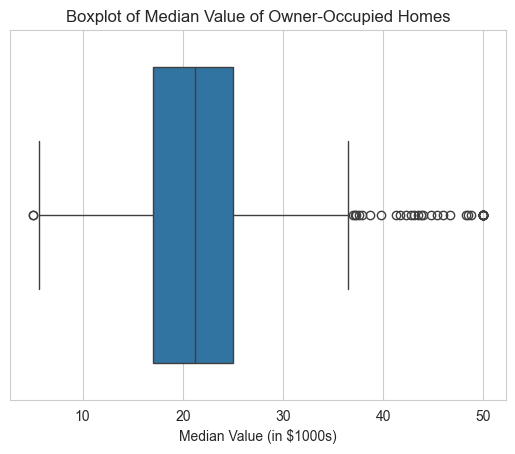

In [16]:
# 1. Boxplot for 'Median value of owner-occupied homes' (MEDV)
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.xlabel('Median Value (in $1000s)')
plt.show()

#### Symmetrical boxplot indicates symmetrical distribution. The length of whisjkers shows the range of the data and we can see here a lot of outliers. The box is centered inside whiskers. The line inside represents the median (50th percentile), which is a central line of dataset. It is not shifted so there is no significant bias.

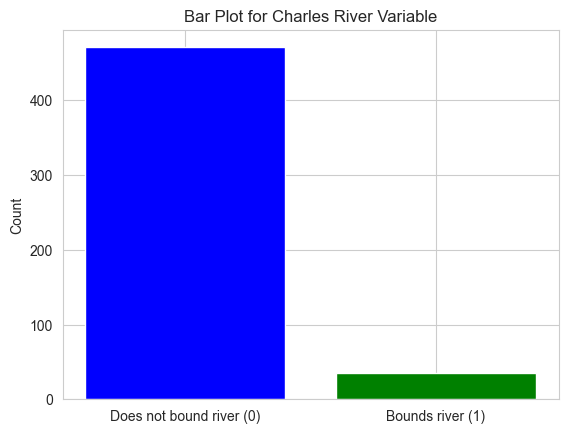

In [17]:
# 2. Bar plot for the Charles River variable (CHAS)
chas_counts = boston_df['CHAS'].value_counts()
chas_labels = ['Does not bound river (0)', 'Bounds river (1)']
plt.bar(chas_labels, chas_counts, color=['blue', 'green'])
plt.title('Bar Plot for Charles River Variable')
plt.ylabel('Count')
plt.show()

#### Bar plot show the count of each category. The category Not bound to the river is most common.

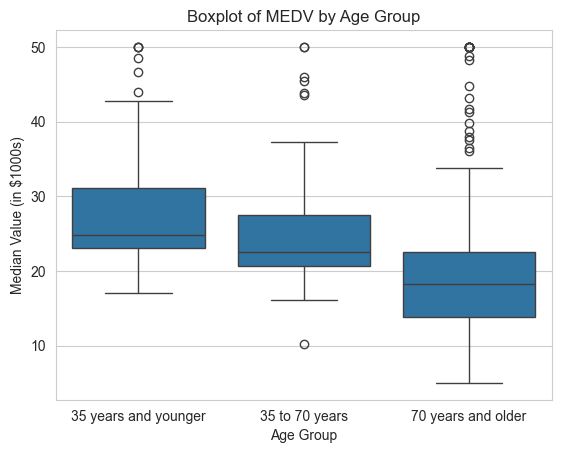

In [18]:
# 3. Boxplot for MEDV vs discretized AGE variable
bins = [0, 35, 70, 100]
labels = ['35 years and younger', '35 to 70 years', '70 years and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value (in $1000s)')
plt.show()

#### Depends of the age the median values lower for younger people. Senior people have more outliers in their median values.

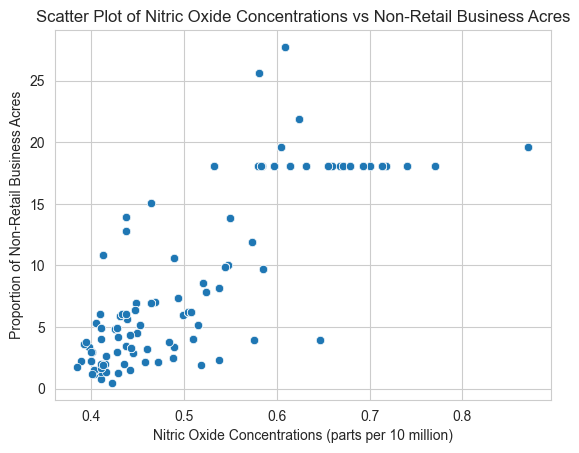

In [19]:
# 4. Scatter plot for NOX vs INDUS
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()

#### The scatter plot shows there is a positive correlation between Nitric Oxide Concentrations and Non-Retail Business Acres.

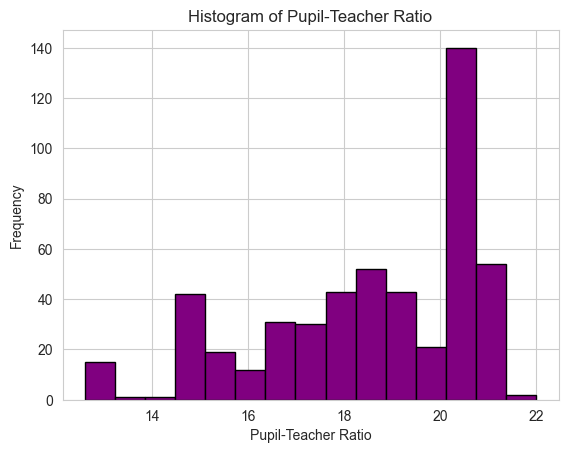

In [20]:
# 5. Histogram for Pupil-Teacher Ratio (PTRATIO)
plt.hist(boston_df['PTRATIO'], bins=15, color='purple', edgecolor='black')
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

#### Here is a picture of the modal distribution.

In [21]:
from scipy import stats

## Task 3: Use the appropriate tests to answer the questions provided.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [22]:
# Split the data based on 'CHAS' (1 if bounded by Charles River, 0 otherwise)
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']  # Houses bounded by Charles River
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']  # Houses not bounded by Charles River

# Perform the T-test
t_stat, p_value = stats.ttest_ind(group1, group2)

# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check if the p-value is less than 0.05 to determine if the difference is statistically significant
if p_value < 0.05:
    print("The difference in median value of houses bounded by the Charles River and not is statistically significant.")
else:
    print("The difference in median value of houses bounded by the Charles River and not is not statistically significant.")



T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
The difference in median value of houses bounded by the Charles River and not is statistically significant.


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [23]:
bins = [0, 20, 50, 100]  # Example bin ranges
labels = ['Low', 'Medium', 'High']
boston_df['AGE_bin'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, include_lowest=True)

# Group by 'AGE_bin' and extract the corresponding 'MEDV' values
group1 = boston_df[boston_df['AGE_bin'] == 'Low']['MEDV']
group2 = boston_df[boston_df['AGE_bin'] == 'Medium']['MEDV']
group3 = boston_df[boston_df['AGE_bin'] == 'High']['MEDV']

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(group1, group2, group3)

# Print the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Check if the p-value is less than 0.05 to determine if the differences are statistically significant
if p_value < 0.05:
    print("There is a significant difference in median values of houses across different proportions of owner-occupied units built prior to 1940.")
else:
    print("There is no significant difference in median values of houses across different proportions of owner-occupied units built prior to 1940.")


F-statistic: 23.2102514419931
P-value: 2.281788717938544e-10
There is a significant difference in median values of houses across different proportions of owner-occupied units built prior to 1940.


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [24]:
from scipy.stats import pearsonr

# Calculate Pearson correlation
corr_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print results
print(f"Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The correlation between NOX and INDUS is statistically significant.")
else:
    print("The correlation between NOX and INDUS is not statistically significant.")

Pearson Correlation Coefficient: 0.7636514469209151
P-value: 7.913361061239527e-98
The correlation between NOX and INDUS is statistically significant.


### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Regression equation: MEDV = 1.0916 * DIS + 18.3901


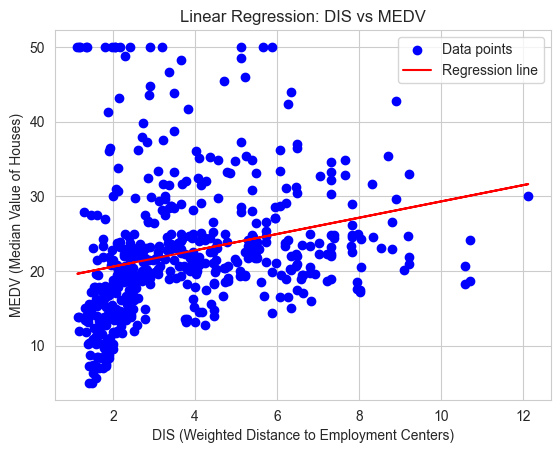

R-squared: 0.0625


In [25]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Select the independent variable (DIS) and the dependent variable (MEDV)
X = boston_df[['DIS']]  # Independent variable (DIS)
y = boston_df['MEDV']   # Dependent variable (MEDV)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the regression coefficients
slope = model.coef_[0]  # Coefficient (slope)
intercept = model.intercept_  # Intercept

# Print the results
print(f"Regression equation: MEDV = {slope:.4f} * DIS + {intercept:.4f}")

# Predict the values based on the model
y_pred = model.predict(X)

# Plotting the regression line along with the data points
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('DIS (Weighted Distance to Employment Centers)')
plt.ylabel('MEDV (Median Value of Houses)')
plt.title('Linear Regression: DIS vs MEDV')
plt.legend()
plt.show()

# Evaluate the model (R-squared score)
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.4f}")


### An R-squared of 0.0625 indicates a weak linear relationship means an unsignificant impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes.